In [8]:
import numpy as np
import matplotlib.pyplot as plt

# optional, alta librarie de ploturi
import arviz as az
az.style.use('arviz-whitegrid')

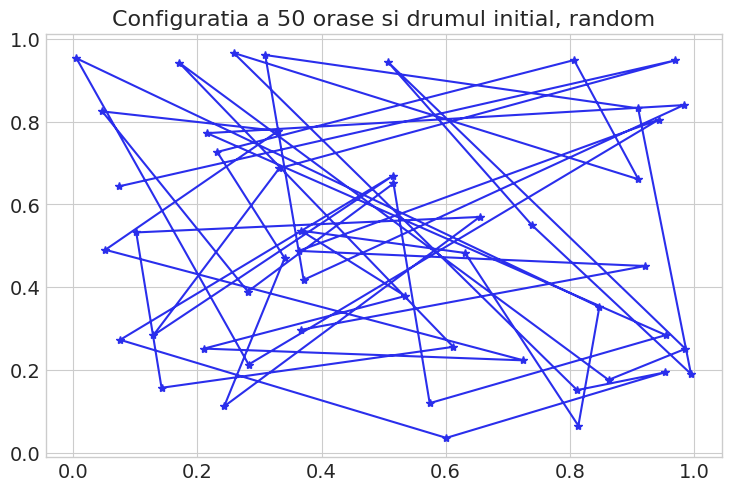

In [9]:
# Initializarea matricei oraselor
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.plot(x,y,'*-')
plt.title(f"Configuratia a {N} orase si drumul initial, random")
plt.savefig('comisvoiajor_druminit')

In [10]:
# Initializam intervalul de temperatura si pasul
Ti = 1
Tf = 0.001
dT = 0.001

# La fiecare pas dT, realizez un numar nreconfig de reconfigurari
nreconfig = 2000

# Temperatura initiala si un numarator
T = Ti
numarator=0

Temp = np.arange(Ti/dT-1)
Lungime = np.arange(Ti/dT-1)

In [11]:
while T>Tf: 

    # Reconfigurari de drum pentru gasirea unui drum mai bun
    for j in range(nreconfig):
        # Aleg random unul dintre orase
        poz = round(1 + (N-5)*np.random.random())

        # Orasul curent
        xc = x.copy()
        yc = y.copy()

        # Algoritmul de reconfigurare este inversarea random a unui drum
        xc[poz+1] = x[poz+2]
        yc[poz+1] = y[poz+2]

        xc[poz+2] = x[poz+1]
        yc[poz+2] = y[poz+1]

        # Calculez lungimile segmentelor 1->2->3->4 pt fiecare config: initiala (x,y) si finala (xc,yc)

        # L initial 
        L = np.sqrt((x[poz]-x[poz+1])**2+(y[poz]-y[poz+1])**2)+np.sqrt((x[poz+1]-x[poz+2])**2+(y[poz+1]-y[poz+2])**2)+np.sqrt((x[poz+2]-x[poz+3])**2+(y[poz+2]-y[poz+3])**2)

        # L reconfigurat
        Lc = np.sqrt((xc[poz]-xc[poz+1])**2+(yc[poz]-yc[poz+1])**2)+np.sqrt((xc[poz+1]-xc[poz+2])**2+(yc[poz+1]-yc[poz+2])**2)+np.sqrt((xc[poz+2]-xc[poz+3])**2+(yc[poz+2]-yc[poz+3])**2)

        # Diferenta dintre lungimi
        DL = Lc - L


        # Probabilitate 
        p = np.exp(-DL/T)

        # Daca p>rand(0,1) atunci aleg drumul nou 
        if p>np.random.random():
            x = xc.copy()
            y = yc.copy()

    
    Temp[numarator] = T

    T = T-dT
    
    # caclulez lungimea
    Lungime[numarator] = 0

    for j in range(N-1):
        Lungime[numarator]=Lungime[numarator] + np.sqrt((x[j]-x[j+1])**2 + (y[j]-y[j+1])**2)

    numarator = numarator +1


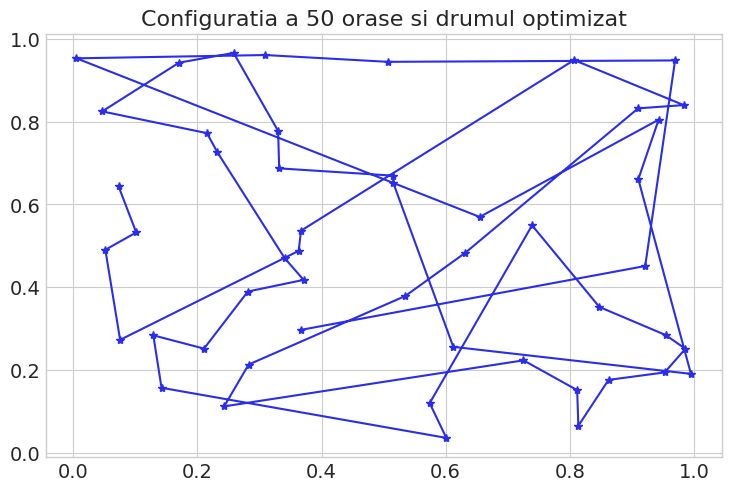

In [12]:
plt.plot(x,y,'*-')
plt.title(f"Configuratia a {N} orase si drumul optimizat")
plt.savefig('comisvoiajor_drumoptimizat')

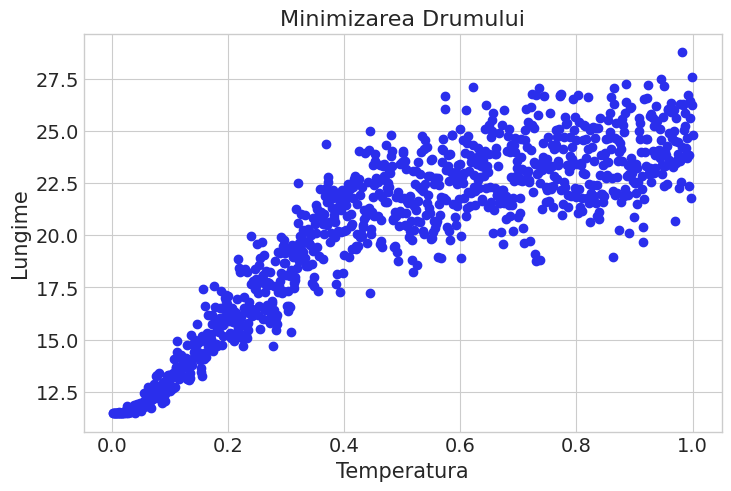

In [13]:
plt.scatter(Temp,Lungime)
plt.xlabel('Temperatura')
plt.ylabel('Lungime')
plt.title('Minimizarea Drumului')
plt.savefig('comisvoiajor_minimizare')